# Seasonal ARIMA Models

## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Seasonal time series

### Seasonal decompose

In [4]:
milk_production = pd.read_csv('milk_production.csv', index_col='date', parse_dates=True)

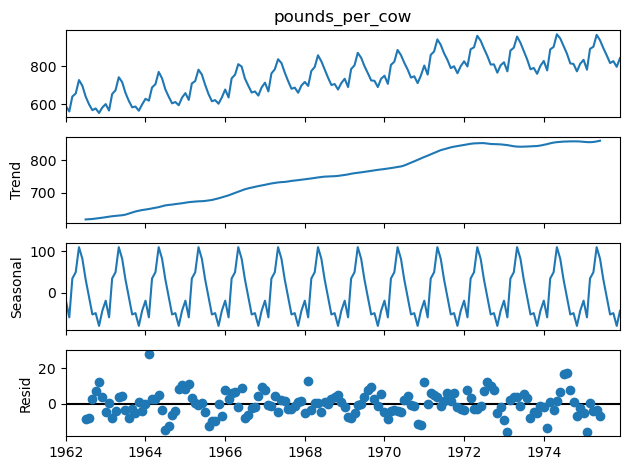

In [7]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

### Seasonal ACF and PACF

In [10]:
water = pd.read_csv('water.csv', index_col='date', parse_dates=True)

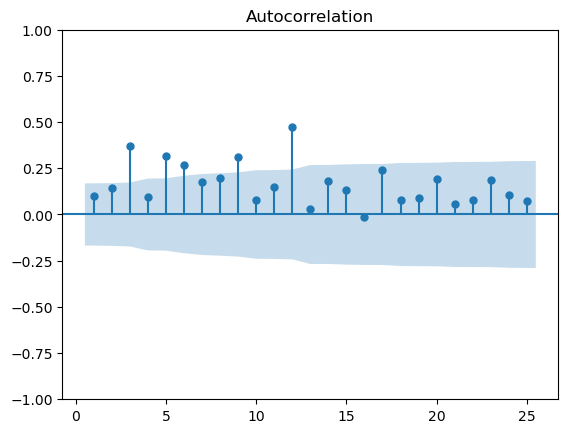

In [11]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

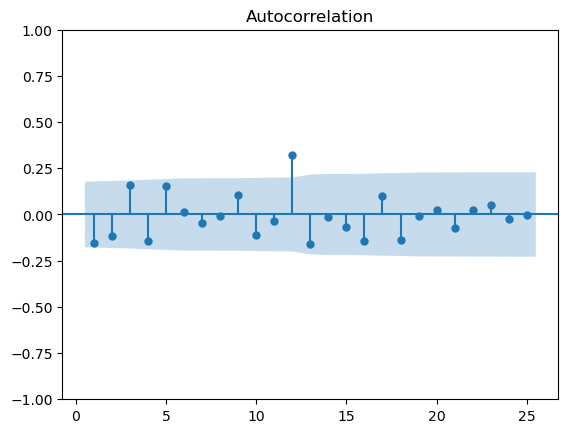

In [12]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

## SARIMA models

### Fitting SARIMA models

In [14]:
df1 = pd.read_csv('df1.csv', index_col='date', parse_dates=True)
df2 = pd.read_csv('df2.csv', index_col='date', parse_dates=True)
df3 = pd.read_csv('df3.csv', index_col='date', parse_dates=True)

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -568.044
Date:                           Mon, 22 Sep 2025   AIC                           1142.088
Time:                                   16:18:40   BIC                           1149.345
Sample:                               01-01-2013   HQIC                          1145.003
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0529      0.107      0.496      0.620      -0.156       0.262
ar.S.L7        0.3020      0.118      2.554

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -575.373
Date:                            Mon, 22 Sep 2025   AIC                           1160.747
Time:                                    16:19:11   BIC                           1172.594
Sample:                                01-01-2013   HQIC                          1165.493
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2361      0.326     -0.725      0.468      -0.874       0.402
ar.L2          0.3560      0.132   

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -525.167
Date:                              Mon, 22 Sep 2025   AIC                           1056.333
Time:                                      16:19:46   BIC                           1063.731
Sample:                                  01-01-2013   HQIC                          1059.312
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3402      0.118      2.882      0.004       0.109       0.572
ma.S.L12      -0.06

### Choosing SARIMA order

In [18]:
aus_employment = pd.read_csv('aus_employment.csv', index_col='date', parse_dates=True)

In [20]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

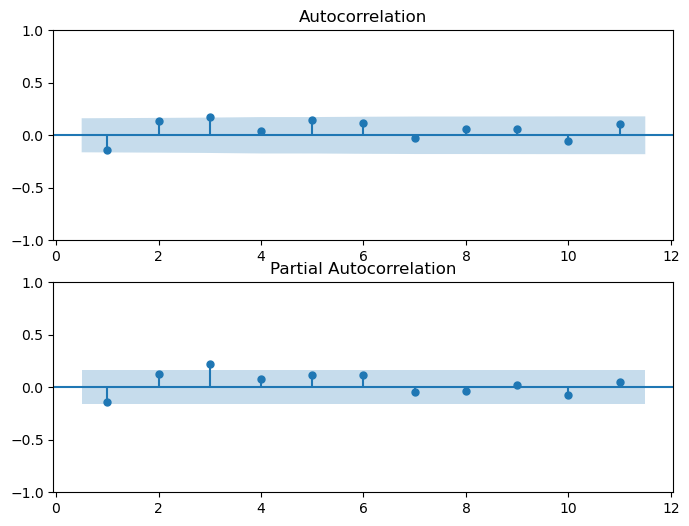

In [22]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, zero=False, lags=11, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, zero=False, lags=11, ax=ax2)

plt.show()

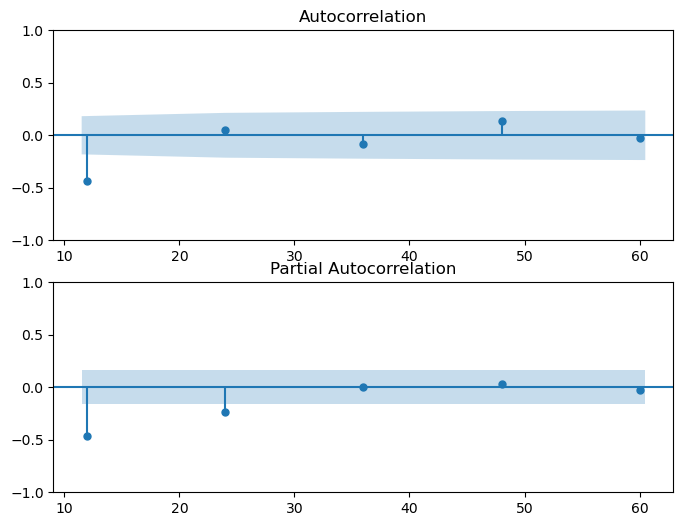

In [23]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, ax=ax2)

plt.show()

### SARIMA vs ARIMA forecasts

In [30]:
wisconsin_test = pd.read_csv('wisconsin_test.csv', index_col='date', parse_dates=True)
dates = wisconsin_test.index

In [27]:
arima_results = ARIMA(wisconsin_test, order=(3,1,2)).fit()
sarima_results = SARIMAX(wisconsin_test, order=(0,1,1), seasonal_order=(1,1,1,12)).fit()

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting paramete

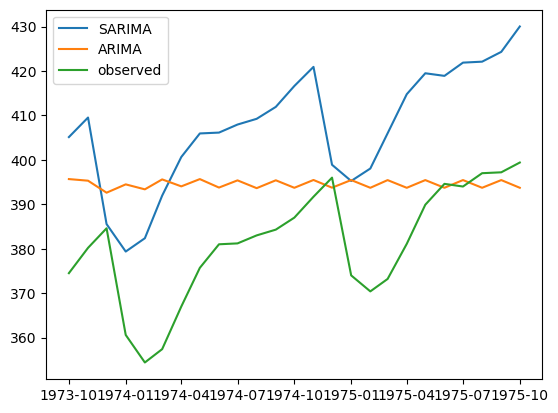

In [31]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

## Automation and saving

### Automated model selection

In [33]:
# Import pmdarima as pm
import pmdarima as pm

In [34]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1147.906, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1143.886, Time=0.14 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1143.044, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1146.099, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=1149.786, Time=0.03 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=1145.041, Time=0.24 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=1145.041, Time=0.36 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=1143.916, Time=0.14 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=1141.085, Time=0.15 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1143.079, Time=0.34 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=1143.079, Time=0.44 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1142.103, Time=0.09 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=0.87 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=1143.038, Time=0.23 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=1144.730, Time=0.45 sec
 ARIMA(0,0,0)(0,1,1)[7]             : AIC=1139.329, Time=0.09 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[7]             : AIC=1141.323, Time=0.16 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[7]             : AIC=1141.323, Time=0.21 sec
 ARIMA(0,0,0)(1,1,0)[7]             : AIC=1140.316, Time=0.06 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[7]             : AIC=1143.327, Time=0.24 sec
 ARIMA(1,0,0)(0,1,1)[7]             : AIC=1141.275, Time=0.11 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7]             : AIC=1141.281, Time=0.10 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,1)[7]             : AIC=1142.950, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,1,1)[7]          
Total fit time: 7.313 seconds
                                 SARIMAX Results                                 
Dep. Variable:                         y   No. Observations:                   90
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood                -567.664
Date:                   Mon, 22 Sep 2025   AIC                           1139.329
Time:                           20:39:52   BIC                           1144.166
Sample:                       01-01-2013   HQIC                          1141.272
                            - 03-31-2013                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7        0.3540      0.115      3.076

In [35]:
# Create model
model2 = pm.auto_arima(
    df2,
    seasonal=False,
    d=1,
    trend='c',
    max_p=2,
    max_q=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1161.826, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1171.365, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1169.142, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1170.947, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1171.365, Time=0.01 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' wa

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1159.766, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1164.735, Time=0.12 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1164.072, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1160.653, Time=0.16 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1159.766, Time=0.21 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 1.354 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -574.883
Date:                Mon, 22 Sep 2025   AIC                           1159.766
Time:                        20:39:54   BIC                           1171.613
Sample:                    01-01-2013   HQIC                          1164.512
                         - 03-21-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    200.9116     81.296      2.471      0.013      41.574 

In [36]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1556.500, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1497.915, Time=0.17 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1539.798, Time=0.03 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1495.918, Time=0.03 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.13 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1497.583, Time=0.20 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[7]             : AIC=122.320, Time=0.63 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=inf, Time=0.10 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.39 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[7] intercept   : AIC=1479.060, Time=0.38 sec

Best model:  ARIMA(1,1,1)(1,1,0)[7]          
Total fit time: 3.640 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 7)   Log Likelihood                 -57.160
Date:                            Mon, 22 Sep 2025   AIC                            122.320
Time:                                    20:39:57   BIC                            132.407
Sample:                                01-01-2013   HQIC                           126.391
                                     - 04-10-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

### Saving and updating models

In [43]:
candy = pd.read_csv('candy_production.csv', 
            parse_dates=['date'],
            index_col='date')
df_new = pd.read_csv('df_new.csv', index_col='date', parse_dates=['date'])

In [50]:
model = pm.auto_arima(
    candy,
    easonal=True, 
    m=12,
    d=0, 
    D=1, 
    start_p=1, 
    start_q=1,
    max_p=1, 
    max_q=1,
    max_P=1, 
    max_Q=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=3038.151, Time=2.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3660.455, Time=0.09 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3135.647, Time=0.92 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3329.958, Time=1.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3666.283, Time=0.07 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3044.193, Time=1.50 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3118.543, Time=1.16 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3196.503, Time=0.29 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=3320.939, Time=1.46 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3056.251, Time=1.48 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=3625.565, Time=1.21 sec


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[12]             : AIC=3039.478, Time=1.53 sec

Best model:  ARIMA(1,0,1)(1,1,1)[12] intercept
Total fit time: 13.170 seconds


In [51]:
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model,filename)

['candy_model.pkl']

In [52]:
# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

In [53]:
# Update the model
loaded_model.update(df_new)

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

## SARIMA and Box-Jenkins

### SARIMA model diagnostics

In [54]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)

In [55]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
)
# Fit model
results = model.fit()

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -183.113
Date:                            Tue, 23 Sep 2025   AIC                            374.226
Time:                                    13:20:02   BIC                            392.510
Sample:                                03-01-1958   HQIC                           381.287
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.081      2.409      0.016       0.037       0.355
ma.L1         -0.5609      0.070   

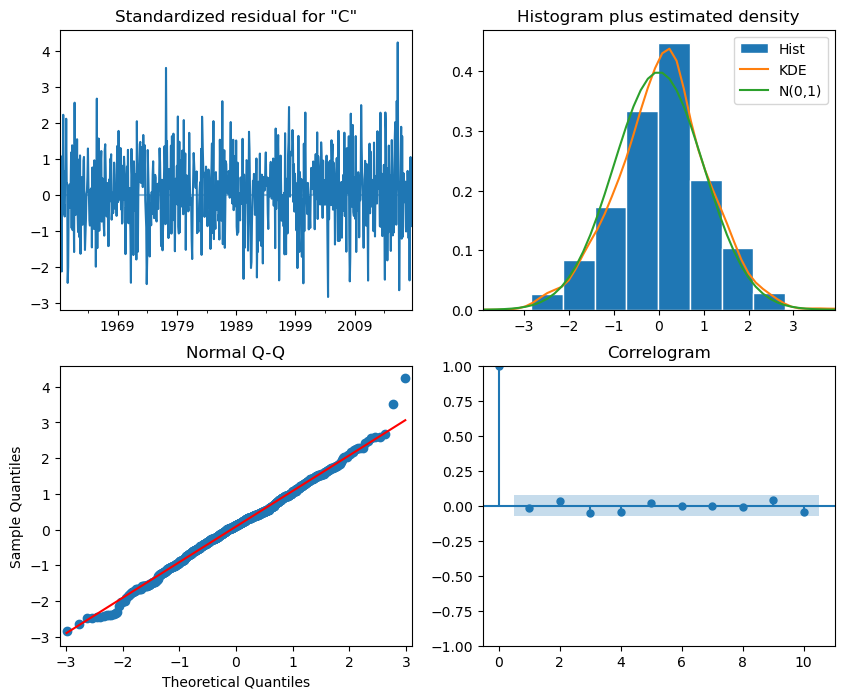

In [57]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(10,8))
plt.show()

### SARIMA forecast

In [58]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

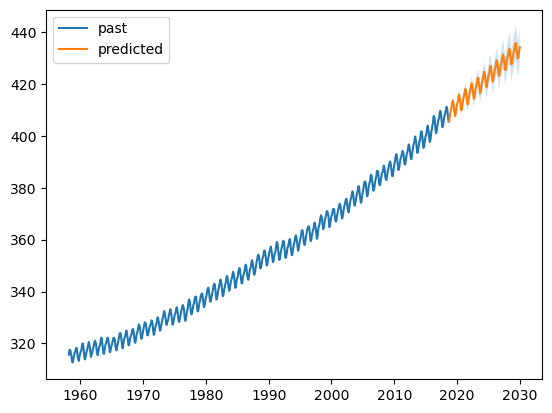

In [59]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [60]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

434.26057318449546
lower CO2_ppm    427.484715
upper CO2_ppm    441.036431
Name: 2030-01-01 00:00:00, dtype: float64
